In [1]:
import scanpy as sc
import numpy as np
import giniclust3 as gc
import anndata

In [2]:
adataRaw=sc.read_text("/Users/gabriele.lubatti/Desktop/Phd/entropy_of_mixing_library/elmir_data/raw_counts_elmir.txt",first_column_names=True)

In [3]:
sc.pp.filter_cells(adataRaw, min_genes=3)

In [4]:
sc.pp.filter_genes(adataRaw,min_cells=200)

In [5]:
adataSC=adataRaw

In [6]:
sc.pp.normalize_per_cell(adataSC, counts_per_cell_after=1e4)

In [7]:
gc.gini.calGini(adataSC) 
adataGini=gc.gini.clusterGini(adataSC,neighbors=3)

Gene number is 8226
Cell number is 1195


In [8]:
gc.fano.calFano(adataSC) ###Calculate Fano factor
adataFano=gc.fano.clusterFano(adataSC) ###Cluster based on Fano factor

In [9]:
consensusCluster={}
consensusCluster['giniCluster']=np.array(adataSC.obs['rare'].values.tolist())
consensusCluster['fanoCluster']=np.array(adataSC.obs['fano'].values.tolist())
gc.consensus.generateMtilde(consensusCluster) ###Generate consensus matrix
gc.consensus.clusterMtilde(consensusCluster) ###Cluster consensus matrix
np.savetxt("final.txt",consensusCluster['finalCluster'], delimiter="\t",fmt='%s')

... storing 'final' as categorical


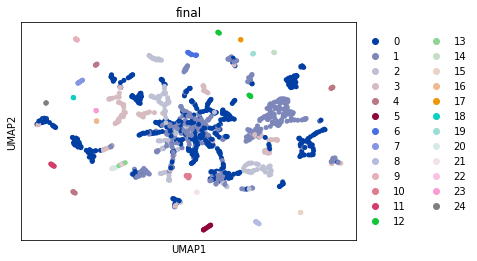

... storing 'rare' as categorical
... storing 'final' as categorical


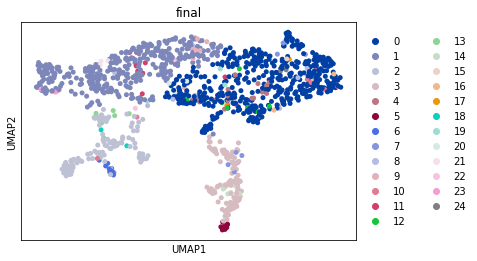

In [10]:
adataGini.obs['final']=consensusCluster['finalCluster']
adataFano.obs['final']=consensusCluster['finalCluster']
gc.plot.plotGini(adataGini)
gc.plot.plotFano(adataFano)

In [ ]:
np.savetxt("only_gini.txt",consensusCluster['giniCluster'], delimiter="\t",fmt='%s')

In [ ]:
np.savetxt("all_gini.txt",consensusCluster['finalCluster'], delimiter="\t",fmt='%s')